In [41]:
import sys
sys.path.append("..")
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
font = {'family' : 'STIXGeneral',
        'size'   : 15}
matplotlib.rc('font', **font)
from sklearn.metrics import r2_score

from occrx.occParams import OCCSystemParams, OCCTestParams, OCCTxParams, OCCRxParams, OCCChannelParams
from occscripts.occscriptutils import Circle, Rectangle
from occscripts.testdetection import DetectionResults
from occscripts.testcalibration import CalibrationResults
from occscripts.testdecoding import DecodingResults

def transformCirclePoints(circle, radius):
    return Circle((radius,radius),circle.radius)
def translatePoints(oldCirclePoint,newCirclePoint,points):
    dx,dy = oldCirclePoint - newCirclePoint
    return (points[0]-dx, points[1]-dy)
def drawCircleMatrix(width,height,circle):
    xx, yy = np.mgrid[:height, :width]
    circleMatrix = (xx - circle.centroid[1]) ** 2 + (yy - circle.centroid[0]) ** 2
    return np.repeat(np.expand_dims(((np.logical_and(circleMatrix < circle.radius ** 2, circleMatrix > 0)).astype(np.int))*255,axis=2),3,axis=2)

tests = {
    "detection":"detectiontests",
    "calibration":"calibration",
    "decoding":"decoding"
}
def getTestFolder(baseFolder,frequency,distance,testType,testNumber):
    return baseFolder+'/f{}_s1920.0x1080.0_fps30.0_g75.0_wb6500_exp3.0_distance{}cm'.format(frequency,distance)\
                        +'/{}/test{}'.format(tests[testType],testNumber)

def getParamsForTest(testFolder):
    
    occSystemParams = OCCSystemParams()
    occTestParams = OCCTestParams()
    occDetetionCircle = Circle()
    occDetectionResults = DetectionResults()
    occCalibrationResults = CalibrationResults()
    occDecodingResults = DecodingResults()
    
    try:
        with open(testFolder+"/occsystemparams.json") as json_file:
            occSystemParams.initFromJSON(json.load(json_file))
    except IOError:
        occSystemParams = None
    try:
        with open(testFolder+"/occtestparams.json") as json_file:
            occTestParams.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/circle.json") as json_file:
            occDetetionCircle.initFromJSON(json.load(json_file))
    except IOError:
        occTestParams = None
    try:
        with open(testFolder+"/detectionresults.json") as json_file:
            occDetectionResults.initFromJSON(json.load(json_file))
    except IOError:
        occDetectionResults = None
    try:
        with open(testFolder+"/calibrationresults.json") as json_file:
            occCalibrationResults.initFromJSON(json.load(json_file))
    except IOError:
        occCalibrationResults = None
    try:
        with open(testFolder+"/decodingresults.json") as json_file:
            occDecodingResults.initFromJSON(json.load(json_file))
    except IOError:
        occDecodingResults = None
    
    return occSystemParams,occTestParams,occDetetionCircle,occDetectionResults,occCalibrationResults,occDecodingResults

In [2]:
baseFolder = '../videos/validation/'
frequency = 2160
distance = 55
calibrationTestNumber = 5

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",calibrationTestNumber))

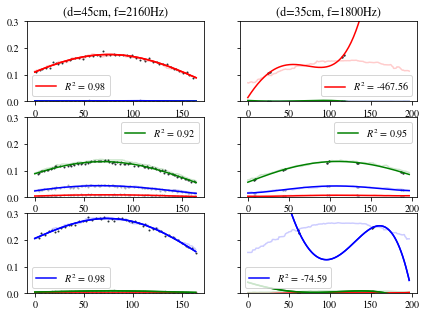

In [3]:
fig, ajustAx = plt.subplots(3, 2, figsize=(7,5),sharey=True)
baseFolder = '../videos/validation/'
frequency = 2160
distance = 45
calibrationTestNumber = 7

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",calibrationTestNumber))

calibrationMeasurements = occCalibrationResults.measuredValues
x = np.arange(calibrationMeasurements.shape[0])

calibrationFitting = occCalibrationResults.predictedValues
realValues = occCalibrationResults.realValues
ajustAx[0,0].set_ylim([0,0.2])
ajustAx[1,0].set_ylim([0,0.15])
ajustAx[2,0].set_ylim([0,0.3])

ajustAx[0,0].title.set_text('(d={}cm, f={}Hz)'.format(distance, frequency))
ajustAx[0,0].plot(realValues[:, 0,0]+0.01, c='r',alpha=0.2)
ajustAx[0,0].plot(realValues[:, 1,0], c='g',alpha=0.2)
ajustAx[0,0].plot(realValues[:, 2,0], c='b',alpha=0.2)

r2Red = r2_score(realValues[:, 0,0]+0.01,calibrationFitting[:, 0,0])
r2Green = r2_score(realValues[:, 1,0],calibrationFitting[:, 1,0])
r2Blue = r2_score(realValues[:, 2,0],calibrationFitting[:, 2,0])

ajustAx[0,0].scatter(x,calibrationMeasurements[:, 0,0], c='#293336',s=1)
ajustAx[0,0].scatter(x,calibrationMeasurements[:, 1,0], c='#a7adba',s=1)
ajustAx[0,0].scatter(x,calibrationMeasurements[:, 2,0], c='#a7adba',s=1)

ajustAx[0,0].plot(calibrationFitting[:, 0,0], c='r', label = '$R^2$ = %0.2f' % r2Red)
ajustAx[0,0].plot(calibrationFitting[:, 1,0], c='g')
ajustAx[0,0].plot(calibrationFitting[:, 2,0], c='b')
ajustAx[0,0].legend(loc = 'lower left')

ajustAx[0,0].plot(calibrationFitting[:, 0,0], c='r')
ajustAx[0,0].plot(calibrationFitting[:, 1,0], c='g')
ajustAx[0,0].plot(calibrationFitting[:, 2,0], c='b')

ajustAx[1,0].plot(realValues[:, 0,1], c='r',alpha=0.2)
ajustAx[1,0].plot(realValues[:, 1,1], c='g',alpha=0.2)
ajustAx[1,0].plot(realValues[:, 2,1], c='b',alpha=0.2)

r2Red = r2_score(realValues[:, 0,1],calibrationFitting[:, 0,1])
r2Green = r2_score(realValues[:, 1,1],calibrationFitting[:, 1,1])
r2Blue = r2_score(realValues[:, 2,1],calibrationFitting[:, 2,1])
ajustAx[1,0].scatter(x,calibrationMeasurements[:, 0,1], c='#a7adba',s=1)
ajustAx[1,0].scatter(x,calibrationMeasurements[:, 1,1], c='#293336',s=1)
ajustAx[1,0].scatter(x,calibrationMeasurements[:, 2,1], c='#a7adba',s=1)

ajustAx[1,0].plot(calibrationFitting[:, 0,1], c='r')
ajustAx[1,0].plot(calibrationFitting[:, 1,1], c='g', label = '$R^2$ = %0.2f' % r2Green)
ajustAx[1,0].plot(calibrationFitting[:, 2,1], c='b')
ajustAx[1,0].legend(loc = 'upper right')

ajustAx[2,0].plot(realValues[:, 0,2], c='r',alpha=0.2)
ajustAx[2,0].plot(realValues[:, 1,2], c='g',alpha=0.2)
ajustAx[2,0].plot(realValues[:, 2,2], c='b',alpha=0.2)
r2Red = r2_score(realValues[:, 0,2],calibrationFitting[:, 0,2])
r2Green = r2_score(realValues[:, 1,2],calibrationFitting[:, 1,2])
r2Blue = r2_score(realValues[:, 2,2],calibrationFitting[:, 2,2])
ajustAx[2,0].scatter(x,calibrationMeasurements[:, 0,2], c='#a7adba',s=1)
ajustAx[2,0].scatter(x,calibrationMeasurements[:, 1,2], c='#a7adba',s=1)
ajustAx[2,0].scatter(x,calibrationMeasurements[:, 2,2], c='#293336',s=1)

ajustAx[2,0].plot(calibrationFitting[:, 0,2], c='r')
ajustAx[2,0].plot(calibrationFitting[:, 1,2], c='g')
ajustAx[2,0].plot(calibrationFitting[:, 2,2], c='b')

ajustAx[2,0].plot(calibrationFitting[:, 0,2], c='r')
ajustAx[2,0].plot(calibrationFitting[:, 1,2], c='g')
ajustAx[2,0].plot(calibrationFitting[:, 2,2], c='b', label = '$R^2$ = %0.2f' % r2Blue)
ajustAx[2,0].legend(loc = 'lower left')

baseFolder = '../videos/validation'
frequency = 1800
distance = 35
calibrationTestNumber = 3

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",calibrationTestNumber))

calibrationMeasurements = occCalibrationResults.measuredValues
x = np.arange(calibrationMeasurements.shape[0])
calibrationFitting = occCalibrationResults.predictedValues
realValues = occCalibrationResults.realValues
ajustAx[0,1].title.set_text('(d={}cm, f={}Hz)'.format(distance, frequency))

ajustAx[0,1].set_ylim([0,0.2])
ajustAx[1,1].set_ylim([0,0.15])
ajustAx[2,1].set_ylim([0,0.3])
ajustAx[0,1].plot(realValues[:, 0,0], c='r',alpha=0.2)
ajustAx[0,1].plot(realValues[:, 1,0], c='g',alpha=0.2)
ajustAx[0,1].plot(realValues[:, 2,0], c='b',alpha=0.2)

r2Red = r2_score(realValues[:, 0,0],calibrationFitting[:, 0,0])
r2Green = r2_score(realValues[:, 1,0],calibrationFitting[:, 1,0])
r2Blue = r2_score(realValues[:, 2,0],calibrationFitting[:, 2,0])

ajustAx[0,1].scatter(x,calibrationMeasurements[:, 0,0], c='#293336',s=2)
ajustAx[0,1].scatter(x,calibrationMeasurements[:, 1,0], c='#a7adba',s=2)
ajustAx[0,1].scatter(x,calibrationMeasurements[:, 2,0], c='#a7adba',s=2)

ajustAx[0,1].plot(calibrationFitting[:, 0,0], c='r', label = '$R^2$ = %0.2f' % r2Red)
ajustAx[0,1].plot(calibrationFitting[:, 1,0], c='g')
# ajustAx[0,1].plot(calibrationFitting[:, 2,0], c='b')

ajustAx[0,1].legend(loc = 'lower right')
ajustAx[1,1].plot(realValues[:, 0,1], c='r',alpha=0.2)
ajustAx[1,1].plot(realValues[:, 1,1], c='g',alpha=0.2)
ajustAx[1,1].plot(realValues[:, 2,1], c='b',alpha=0.2)

r2Red = r2_score(realValues[:, 0,1],calibrationFitting[:, 0,1])
r2Green = r2_score(realValues[:, 1,1],calibrationFitting[:, 1,1])
r2Blue = r2_score(realValues[:, 2,1],calibrationFitting[:, 2,1])
ajustAx[1,1].scatter(x,calibrationMeasurements[:, 0,1], c='#a7adba',s=2)
ajustAx[1,1].scatter(x,calibrationMeasurements[:, 1,1], c='#293336',s=2)
ajustAx[1,1].scatter(x,calibrationMeasurements[:, 2,1], c='#a7adba',s=2)

ajustAx[1,1].plot(calibrationFitting[:, 0,1], c='r')
ajustAx[1,1].plot(calibrationFitting[:, 1,1], c='g', label = '$R^2$ = %0.2f' % r2Green)
ajustAx[1,1].plot(calibrationFitting[:, 2,1], c='b')
ajustAx[1,1].legend(loc = 'upper right')
ajustAx[2,1].plot(realValues[:, 0,2], c='r',alpha=0.2)
ajustAx[2,1].plot(realValues[:, 1,2], c='g',alpha=0.2)
ajustAx[2,1].plot(realValues[:, 2,2], c='b',alpha=0.2)

r2Red = r2_score(realValues[:, 0,2],calibrationFitting[:, 0,2])
r2Green = r2_score(realValues[:, 1,2],calibrationFitting[:, 1,2])
r2Blue = r2_score(realValues[:, 2,2],calibrationFitting[:, 2,2])
ajustAx[2,1].scatter(x,calibrationMeasurements[:, 0,2], c='#a7adba',s=2)
ajustAx[2,1].scatter(x,calibrationMeasurements[:, 1,2], c='#a7adba',s=2)
ajustAx[2,1].scatter(x,calibrationMeasurements[:, 2,2], c='#293336',s=2)

ajustAx[2,1].plot(calibrationFitting[:, 0,2], c='r')
ajustAx[2,1].plot(calibrationFitting[:, 1,2], c='g')
ajustAx[2,1].plot(calibrationFitting[:, 2,2], c='b')

ajustAx[2,1].plot(calibrationFitting[:, 0,2], c='r')
ajustAx[2,1].plot(calibrationFitting[:, 1,2], c='g')
ajustAx[2,1].plot(calibrationFitting[:, 2,2], c='b', label = '$R^2$ = %0.2f' % r2Blue)
ajustAx[2,1].legend(loc = 'lower left')

# plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )
# plt.show()
# plt.savefig('calibration.pdf', bbox_inches='tight')

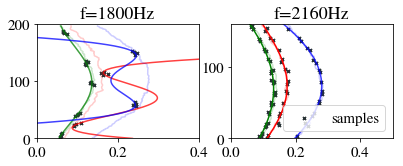

In [55]:
fig, ajustAx = plt.subplots(1, 2,figsize=(2.125*3,0.7*3),sharey=False,sharex=False)
baseFolder = '../videos/validation/'
frequency = 2160
distance = 45
calibrationTestNumber = 5

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",calibrationTestNumber))

calibrationMeasurements = occCalibrationResults.measuredValues
x = np.arange(calibrationMeasurements.shape[0])
calibrationFitting = occCalibrationResults.predictedValues
realValues = occCalibrationResults.realValues

indexes = np.arange(0,len(realValues))
ajustAx[1].set_ylim([0,160])
ajustAx[1].set_xlim([0,0.5])

ajustAx[1].title.set_text('f={}Hz'.format(frequency))
ajustAx[1].plot(realValues[:, 0,0]+0.01,indexes, c='r',alpha=0.2)

r2Red = r2_score(realValues[:, 0,0]+0.01,calibrationFitting[:, 0,0])
ajustAx[1].scatter(calibrationMeasurements[:, 0,0],indexes, c='#293336',s=10,marker='x')
ajustAx[1].plot(calibrationFitting[:, 0,0],indexes, c='r')#, label = '$R^2$ = %0.2f' % r2Red)
ajustAx[1].plot(realValues[:, 1,1],indexes, c='g',alpha=0.2)

r2Green = r2_score(realValues[:, 1,1],calibrationFitting[:, 1,1])
ajustAx[1].scatter(calibrationMeasurements[:, 1,1],indexes, c='#293336',s=10,marker='x')
ajustAx[1].plot(calibrationFitting[:, 1,1],indexes, c='g')#, label = '$R^2$ = %0.2f' % r2Green)
ajustAx[1].plot(realValues[:, 2,2],indexes, c='b',alpha=0.2)

r2Blue = r2_score(realValues[:, 2,2],calibrationFitting[:, 2,2])
ajustAx[1].scatter(calibrationMeasurements[:, 2,2],indexes, c='#293336',s=10,marker='x', label = 'samples')
ajustAx[1].plot(calibrationFitting[:, 2,2],indexes, c='b',alpha=0.75)#, label = '$R^2$ = %0.2f' % r2Blue)
ajustAx[1].legend(loc = 'lower right', prop={'size': 15})

baseFolder = '../videos/validation/'
frequency = 1800
distance = 45
calibrationTestNumber = 5

occSystemParams,\
occTestParams,\
occDetetionCircle,\
occDetectionResults,\
occCalibrationResults,\
occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",calibrationTestNumber))

calibrationMeasurements = occCalibrationResults.measuredValues
x = np.arange(calibrationMeasurements.shape[0])
calibrationFitting = occCalibrationResults.predictedValues
realValues = occCalibrationResults.realValues
indexes = np.arange(0,len(realValues))
ajustAx[0].set_ylim([0,200])
ajustAx[0].set_xlim([0,0.4])
ajustAx[0].title.set_text('f={}Hz'.format(frequency))

ajustAx[0].plot(realValues[:, 0,0]+0.01,indexes, c='r',alpha=0.2)
r2Red = r2_score(realValues[:, 0,0],calibrationFitting[:, 0,0])
ajustAx[0].scatter(calibrationMeasurements[:, 0,0],indexes, c='#293336',s=10,marker='x')
ajustAx[0].plot(calibrationFitting[:, 0,0],indexes, c='r',alpha=0.75)#, label = '$R^2$ = %0.2f' % r2Red)

ajustAx[0].plot(realValues[:, 1,1],indexes, c='g',alpha=0.2)
r2Green = r2_score(realValues[:, 1,1],calibrationFitting[:, 1,1])
ajustAx[0].scatter(calibrationMeasurements[:, 1,1],indexes, c='#293336',s=10,marker='x')
ajustAx[0].plot(calibrationFitting[:, 1,1],indexes, c='g',alpha=0.75)#, label = '$R^2$ = %0.2f' % r2Green)
ajustAx[0].plot(realValues[:, 2,2],indexes, c='b',alpha=0.2)

r2Blue = r2_score(realValues[:, 2,2],calibrationFitting[:, 2,2])
ajustAx[0].scatter(calibrationMeasurements[:, 2,2],indexes, c='#293336',s=10,marker='x', label = 'samples')
# ajustAx[1].plot(calibrationFitting[:, 2,2],indexes, c='b',alpha=0.5)
ajustAx[0].plot(calibrationFitting[:, 2,2],indexes, c='b',alpha=0.75)#, label = '$R^2$ < 0' % r2Blue)
# ajustAx[0].legend(loc = 'upper right', prop={'size': 12})
plt.savefig('./out/calibration4.pdf', bbox_inches='tight')

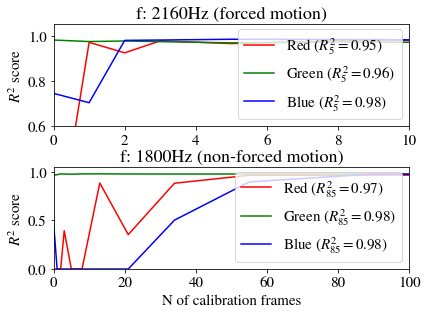

In [48]:
from mpl_toolkits.mplot3d import Axes3D

def rscores(realValues, predictedValues):
    r2Red = r2_score(realValues[:,0,0]+0.01,predictedValues[:,0,0])
    r2Green = r2_score(realValues[:, 1,1],predictedValues[:, 1,1])
    r2Blue = r2_score(realValues[:, 2,2],predictedValues[:, 2,2])
    return r2Red,r2Green,r2Blue

baseFolder = '../videos/validation/'
frequency = 2160
calibrations = [0,1,2,3,5,8,13,21,34,55,89,144]
distance = 50
rscoresMatrix = []

fig,ax = plt.subplots(2,1,figsize=(2.125*3,1.5*3),sharex=False,sharey=False)
# for distance in distances:
rscoresMatrix = []
for index, calibration in enumerate(calibrations):
    
    occSystemParams,\
    occTestParams,\
    occDetetionCircle,\
    occDetectionResults,\
    occCalibrationResults,\
    occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",index))

    r2Red,r2Green,r2Blue = rscores(occCalibrationResults.realValues, occCalibrationResults.predictedValues)

    rscoresMatrix.append([r2Red,r2Green,r2Blue])

rscoresMatrix = np.array(rscoresMatrix)
rscoresMatrix[rscoresMatrix<0]=0

distanceVector = (np.zeros(len(calibrations)))
distanceVector = distanceVector + distance
ax[0].plot(calibrations,rscoresMatrix[:,0],c="r", label = 'Red ($R^2_{5}=$%0.2f)' % 0.95)
#            rscoresMatrix[len(rscoresMatrix)-1,0])
ax[0].plot(calibrations,rscoresMatrix[:,1],c="g", label = 'Green ($R^2_{5}=$%0.2f)' % rscoresMatrix[len(rscoresMatrix)-1,1])
ax[0].plot(calibrations,rscoresMatrix[:,2],c="b", label = 'Blue ($R^2_{5}=$%0.2f)' % rscoresMatrix[len(rscoresMatrix)-1,2])
ax[0].set_ylabel('$R^2$ score')
ax[0].set_xlim([0,10])
ax[0].set_ylim([0.6, 1.05])
ax[0].set_title('f: {}Hz (forced motion)'.format(frequency))
ax[0].legend(loc = 'lower right', prop={'size': 15})

baseFolder = '../videos/validation'
frequency = 1800
calibrations = [0,1,2,3,5,8,13,21,34,55,89,144]
# for distance in distances:
rscoresMatrix = []
for index, calibration in enumerate(calibrations):
    
    occSystemParams,\
    occTestParams,\
    occDetetionCircle,\
    occDetectionResults,\
    occCalibrationResults,\
    occDecodingResults = getParamsForTest(getTestFolder(baseFolder,frequency,distance,"calibration",index))

    r2Red,r2Green,r2Blue = rscores(occCalibrationResults.realValues, occCalibrationResults.predictedValues)

    rscoresMatrix.append([r2Red,r2Green,r2Blue])
rscoresMatrix = np.array(rscoresMatrix)
rscoresMatrix[rscoresMatrix<0]=0

distanceVector = (np.zeros(len(calibrations)))
distanceVector = distanceVector + distance
ax[1].plot(calibrations,rscoresMatrix[:,0],c="r", label = 'Red ($R^2_{85}=$%0.2f)' % rscoresMatrix[len(rscoresMatrix)-1,0])
ax[1].plot(calibrations,rscoresMatrix[:,1],c="g", label = 'Green ($R^2_{85}=$%0.2f)' % rscoresMatrix[len(rscoresMatrix)-1,1])
ax[1].plot(calibrations,rscoresMatrix[:,2],c="b", label = 'Blue ($R^2_{85}=$%0.2f)' % rscoresMatrix[len(rscoresMatrix)-1,2])
ax[1].set_ylabel('$R^2$ score')
ax[1].set_xlabel('N of calibration frames')
ax[1].set_title('f: {}Hz (non-forced motion)'.format(frequency))
ax[1].set_xlim([0,100])
ax[1].set_ylim([0, 1.05])
ax[1].legend(loc = 'lower right', prop={'size': 15})
plt.subplots_adjust(hspace = 0.4)
plt.savefig('./out/r2score4.pdf', bbox_inches='tight')